#LSTM and ARIMA with CCI (Commodity Channel Index) Technical Indicator


**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator

In [ ]:
base = pd.read_csv('AMD 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689


In [ ]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689
...,...,...,...,...,...,...
1253,10/15/2019,$30.72,42142390,$30.70,$30.92,$30.17
1254,10/14/2019,$30.53,44818230,$29.71,$30.61,$29.38
1255,10/11/2019,$29.75,66632450,$28.83,$30.20,$28.81
1256,10/10/2019,$28.38,41172000,$28.52,$28.89,$28.00


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'], window=20, constant=0.015)
base['CCI'] = cci.cci()

sma_tp = base['High'] + base['Low'] + base['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base['Close/Last'], window=14)
base['RSI'] = rsi.rsi()

macd = MACD(close=base['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base['MACD'] = macd.macd()
base['MACD_Signal'] = macd.macd_signal()
base['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'])
base['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base['Close/Last'], window=20, window_dev=2)
base['Bollinger_High'] = bollinger.bollinger_hband()
base['Bollinger_Low'] = bollinger.bollinger_lband()
base['Bollinger_Middle'] = bollinger.bollinger_mavg()
base['Bollinger_Width'] = bollinger.bollinger_wband()

base.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,157.81,42791250,156.12,158.6500,155.07,128.490106,56.724050,-1.735664,-4.266283,2.530619,146.212562,159.538951,134.672049,147.1055,16.904128
34,08/20/2024,156.40,76851160,156.49,162.0400,154.51,120.837780,54.942210,-1.096467,-3.632320,2.535853,148.392952,160.585017,134.436983,147.5110,17.726158
35,08/19/2024,155.28,60766850,148.43,155.3650,147.72,60.194674,53.504486,-0.672520,-3.040360,2.367840,162.040000,161.173218,134.294782,147.7340,18.193805
36,08/16/2024,148.56,31123930,145.70,149.3693,145.20,2.305252,45.766121,-0.868773,-2.606043,1.737270,162.040000,160.856405,134.259595,147.5580,18.024648
37,08/15/2024,147.36,43582390,143.00,147.9600,141.81,-19.231609,44.527651,-1.108358,-2.306506,1.198148,161.366400,160.428964,134.192036,147.3105,17.810630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,30.72,42142390,30.70,30.9200,30.17,-99.383285,24.075332,-2.154763,-2.139259,-0.015504,31.550800,37.639676,29.249324,33.4445,25.087388
1254,10/14/2019,30.53,44818230,29.71,30.6100,29.38,-105.536352,23.449722,-2.121456,-2.135699,0.014243,31.410000,37.317478,28.993522,33.1555,25.105806
1255,10/11/2019,29.75,66632450,28.83,30.2000,28.81,-117.461809,21.033342,-2.133407,-2.135240,0.001833,31.004000,36.981669,28.675331,32.8285,25.302215
1256,10/10/2019,28.38,41172000,28.52,28.8900,28.00,-148.813340,17.602422,-2.227746,-2.153741,-0.074004,30.610000,36.699642,28.167358,32.4335,26.307012


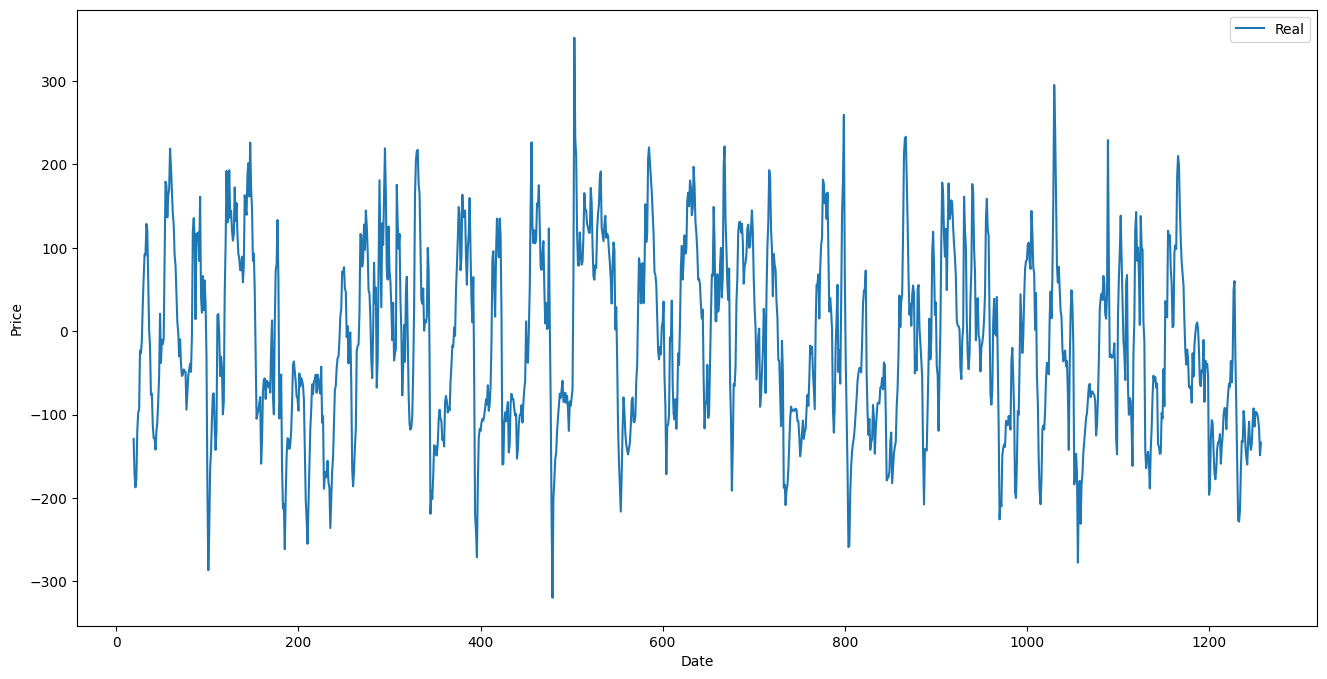

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['CCI'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

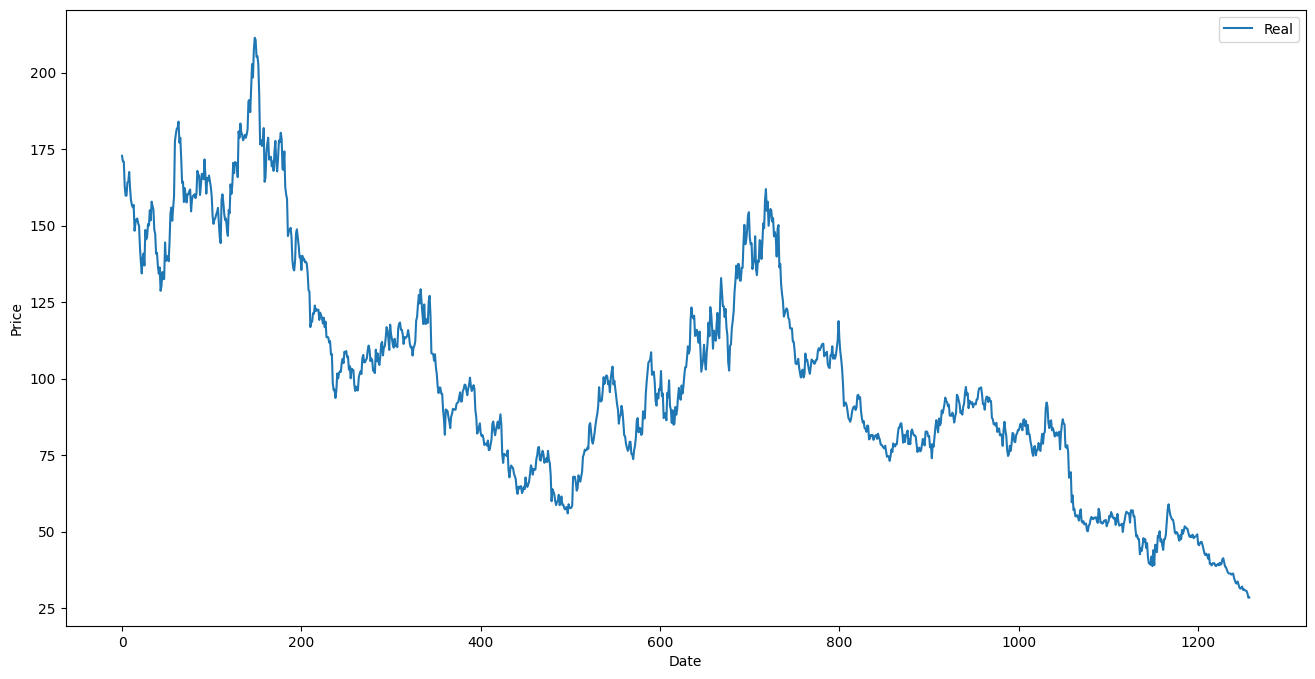

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base = base.replace([np.inf, -np.inf], np.nan)
base = base.dropna()

In [ ]:
# Normalizing the data of real values
scaler_real_value = MinMaxScaler(feature_range=(0, 1))
scaled_data_real_value = scaler_real_value.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size_real_value = 10
forecasters_real_value = []
real_value_of_prices = []
for i in range(window_size_real_value, len(base)):
    forecasters_real_value.append(scaled_data_real_value[i - window_size_real_value:i, 0])
    real_value_of_prices.append(scaled_data_real_value[i, 0])

forecasters_real_value, real_value_of_prices = np.array(forecasters_real_value), np.array(real_value_of_prices)
forecasters_real_value = np.reshape(forecasters_real_value, (forecasters_real_value.shape[0], forecasters_real_value.shape[1], 1))

In [ ]:
#dividindo a coluna close/last em 70% treino e 30% teste com trai_test_split
Xtrain_real_lstm, Xtest_real_lstm, ytrain_real_lstm, ytest_real_lstm = train_test_split(forecasters_real_value, real_value_of_prices,
                                                                                        test_size = 0.3, shuffle = False)

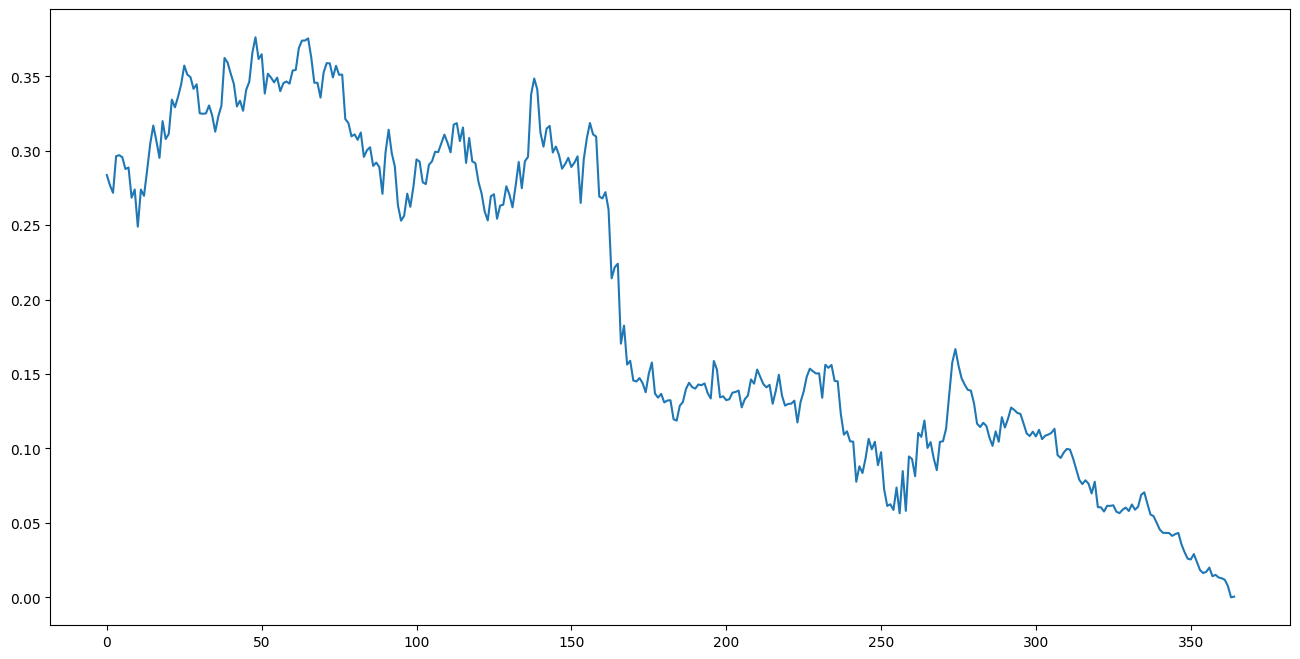

In [ ]:
#plotando grafico dos valores de teste
plt.figure(figsize=(16,8))
plt.plot(ytest_real_lstm)
plt.show()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['CCI']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

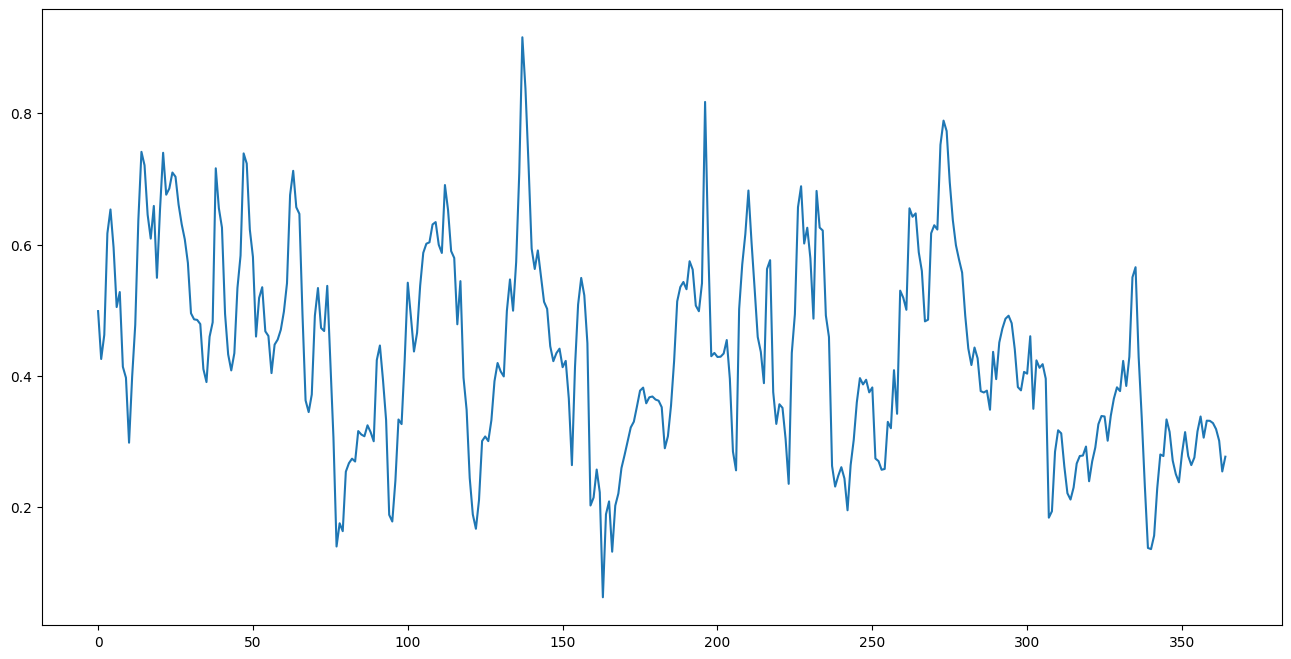

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test)
plt.show()

In [ ]:
# LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.1203 - mean_absolute_error: 0.2882 - val_loss: 0.0207 - val_mean_absolute_error: 0.1112
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0247 - mean_absolute_error: 0.1234 - val_loss: 0.0189 - val_mean_absolute_error: 0.1091
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0268 - mean_absolute_error: 0.1299 - val_loss: 0.0194 - val_mean_absolute_error: 0.1131
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0232 - mean_absolute_error: 0.1220 - val_loss: 0.0200 - val_mean_absolute_error: 0.1155
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.1251 - val_loss: 0.0179 - val_mean_absolute_error: 0.1067
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.1261 - val_loss: 0.0176 - val_mean_absolute_error: 0.1057
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0238 - mean_absolute_error: 0.1229 - v

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#escalonando valores de teste
ytest_real_lstm = scaler_real_value.inverse_transform(ytest_real_lstm.reshape(-1, 1))

In [ ]:
test_predictions = test_predictions.ravel()
y_orig_test = y_orig_test.ravel()
ytest_real_lstm = ytest_real_lstm.ravel()

In [ ]:
# Getting the high, low and close values ​​from the test set for the CCI
test_size_L = len(y_test)

high_test_L = base['High'].tail(test_size_L)
low_test_L = base['Low'].tail(test_size_L)
close_test_L = base['Close/Last'].tail(test_size_L)

In [ ]:
# Inverse CCI formula
def cci_inverse(cci_values, high, low, close):
    tp = (high + low + close) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_deviation = (tp - sma_tp).abs().rolling(window=20).mean()
    tp_inverted = cci_values * 0.015 * mean_deviation + sma_tp
    return tp_inverted

In [ ]:
# Inverting the values ​​test_predictions and y_orig_teste by the inverse CCI formula
test_predictions_inverted = cci_inverse(test_predictions, high_test_L, low_test_L, close_test_L)
y_orig_test_inverted = cci_inverse(y_orig_test, high_test_L, low_test_L, close_test_L)

# Removing NaN values
test_predictions_inverted = test_predictions_inverted.dropna()
y_orig_test_inverted = y_orig_test_inverted.dropna()

min_length = min(len(ytest_real_lstm), len(test_predictions_inverted))
ytest_real_lstm = ytest_real_lstm[:min_length]
test_predictions_inverted = test_predictions_inverted[:min_length]


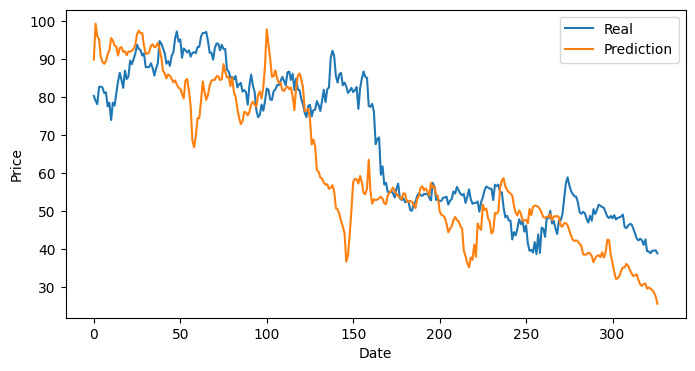

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(ytest_real_lstm)), ytest_real_lstm, label='Real')
plt.plot(range(len(test_predictions_inverted)), test_predictions_inverted, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# R2 Score
r2 = r2_score(ytest_real_lstm, test_predictions_inverted)
print(f'R2 Score: {r2}')

# RMSE
rmse = np.sqrt(np.mean((ytest_real_lstm - test_predictions_inverted) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.5122778573353024
RMSE: 12.813118950052885


**ARIMA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator
from math import sqrt

In [ ]:
base_A = pd.read_csv('AMD 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'], window=20, constant=0.015)
base_A['CCI'] = cci.cci()

sma_tp = base_A['High'] + base_A['Low'] + base_A['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base_A['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base_A['Close/Last'], window=14)
base_A['RSI'] = rsi.rsi()

macd = MACD(close=base_A['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base_A['MACD'] = macd.macd()
base_A['MACD_Signal'] = macd.macd_signal()
base_A['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'])
base_A['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base_A['Close/Last'], window=20, window_dev=2)
base_A['Bollinger_High'] = bollinger.bollinger_hband()
base_A['Bollinger_Low'] = bollinger.bollinger_lband()
base_A['Bollinger_Middle'] = bollinger.bollinger_mavg()
base_A['Bollinger_Width'] = bollinger.bollinger_wband()

base_A.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,157.81,42791250,156.12,158.6500,155.07,128.490106,56.724050,-1.735664,-4.266283,2.530619,146.212562,159.538951,134.672049,147.1055,16.904128
34,08/20/2024,156.40,76851160,156.49,162.0400,154.51,120.837780,54.942210,-1.096467,-3.632320,2.535853,148.392952,160.585017,134.436983,147.5110,17.726158
35,08/19/2024,155.28,60766850,148.43,155.3650,147.72,60.194674,53.504486,-0.672520,-3.040360,2.367840,162.040000,161.173218,134.294782,147.7340,18.193805
36,08/16/2024,148.56,31123930,145.70,149.3693,145.20,2.305252,45.766121,-0.868773,-2.606043,1.737270,162.040000,160.856405,134.259595,147.5580,18.024648
37,08/15/2024,147.36,43582390,143.00,147.9600,141.81,-19.231609,44.527651,-1.108358,-2.306506,1.198148,161.366400,160.428964,134.192036,147.3105,17.810630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,30.72,42142390,30.70,30.9200,30.17,-99.383285,24.075332,-2.154763,-2.139259,-0.015504,31.550800,37.639676,29.249324,33.4445,25.087388
1254,10/14/2019,30.53,44818230,29.71,30.6100,29.38,-105.536352,23.449722,-2.121456,-2.135699,0.014243,31.410000,37.317478,28.993522,33.1555,25.105806
1255,10/11/2019,29.75,66632450,28.83,30.2000,28.81,-117.461809,21.033342,-2.133407,-2.135240,0.001833,31.004000,36.981669,28.675331,32.8285,25.302215
1256,10/10/2019,28.38,41172000,28.52,28.8900,28.00,-148.813340,17.602422,-2.227746,-2.153741,-0.074004,30.610000,36.699642,28.167358,32.4335,26.307012


In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,157.81,42791250,156.12,158.6500,155.07,128.490106,56.724050,-1.735664,-4.266283,2.530619,146.212562,159.538951,134.672049,147.1055,16.904128
34,08/20/2024,156.40,76851160,156.49,162.0400,154.51,120.837780,54.942210,-1.096467,-3.632320,2.535853,148.392952,160.585017,134.436983,147.5110,17.726158
35,08/19/2024,155.28,60766850,148.43,155.3650,147.72,60.194674,53.504486,-0.672520,-3.040360,2.367840,162.040000,161.173218,134.294782,147.7340,18.193805
36,08/16/2024,148.56,31123930,145.70,149.3693,145.20,2.305252,45.766121,-0.868773,-2.606043,1.737270,162.040000,160.856405,134.259595,147.5580,18.024648
37,08/15/2024,147.36,43582390,143.00,147.9600,141.81,-19.231609,44.527651,-1.108358,-2.306506,1.198148,161.366400,160.428964,134.192036,147.3105,17.810630


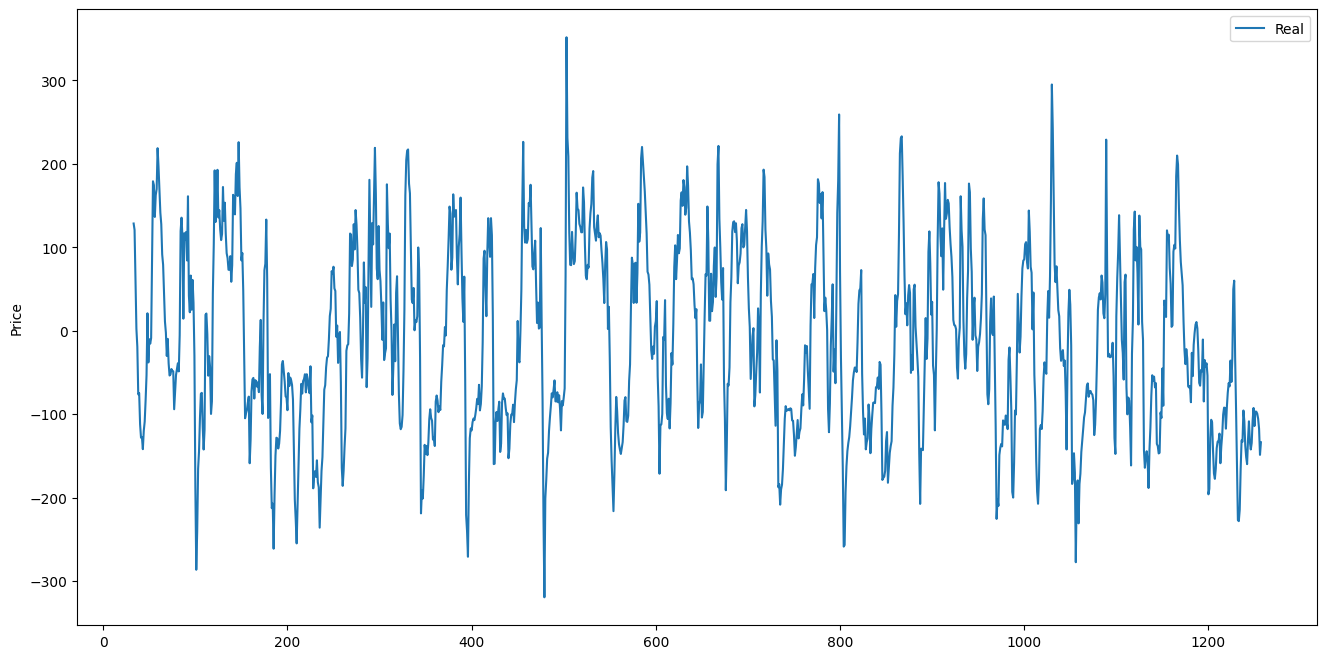

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['CCI'], label='Real')
plt.ylabel('Price')
plt.legend()

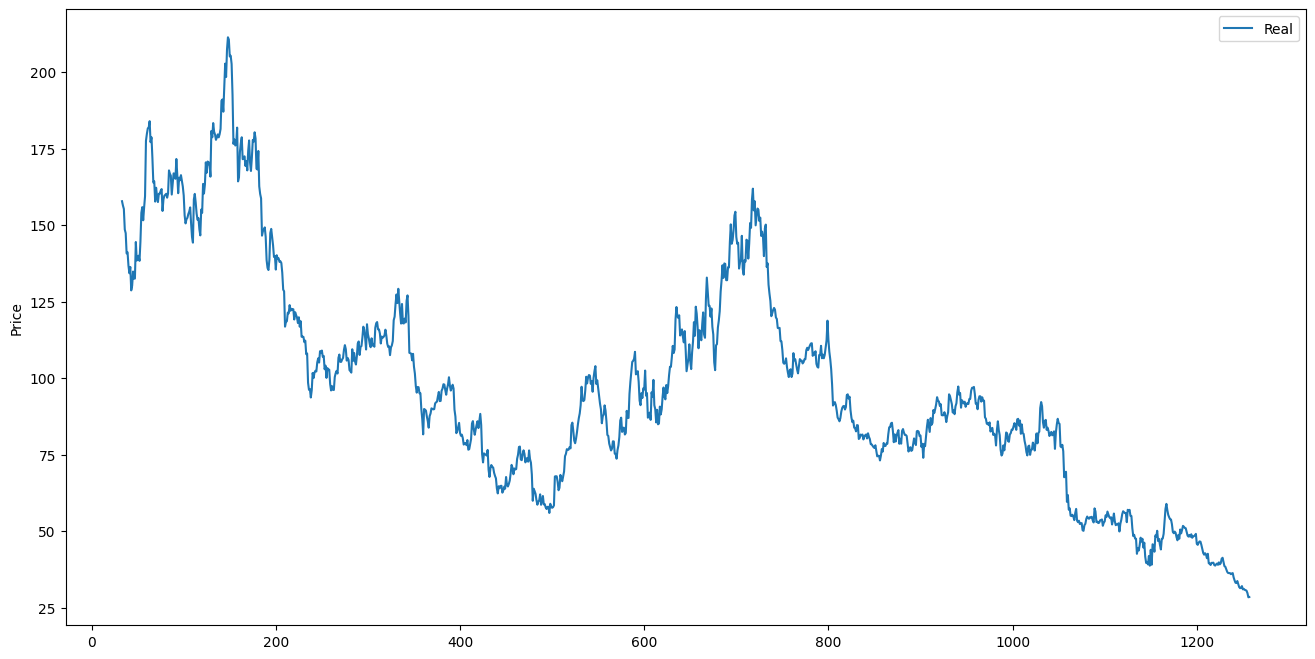

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
X_R = base_A['Close/Last'].values
size_R = int(len(X_R) * 0.70)
train_R, test_R = X_R[0:size_R], X_R[size_R:len(X_R)]
history_R = [x_r for x_r in train_R]
forecasts_R = list()

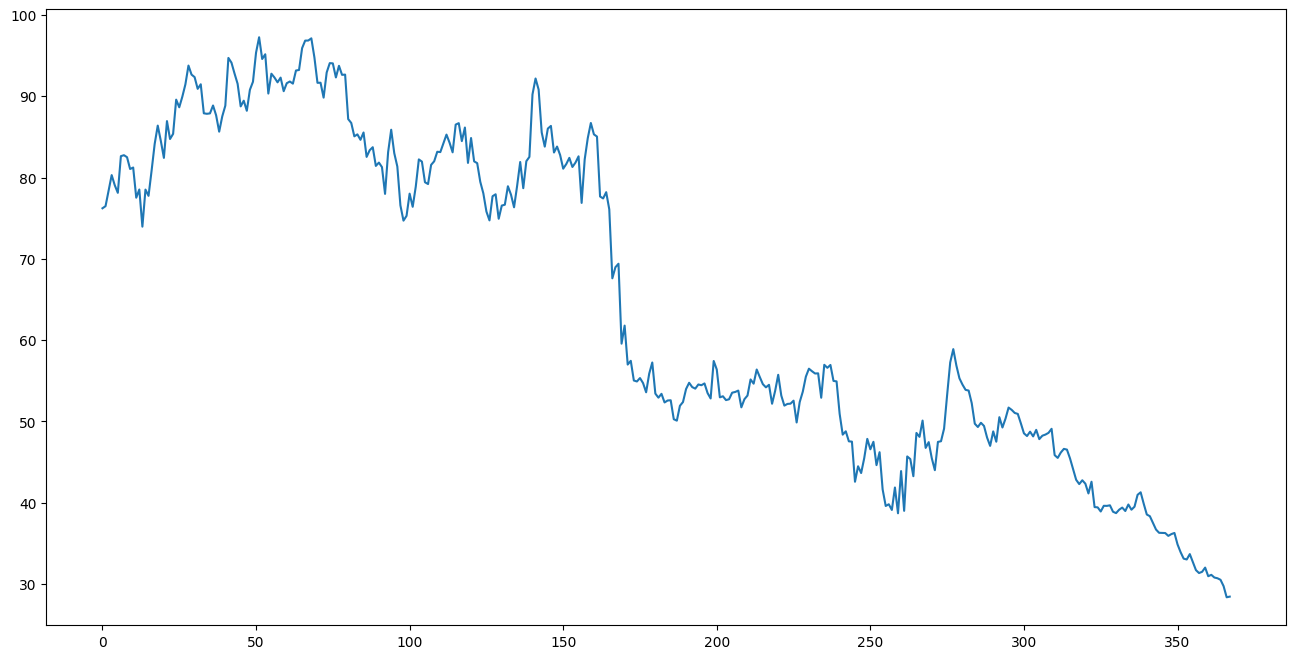

In [ ]:
#Test Grafic
plt.figure(figsize=(16, 8))
plt.plot(test_R)
plt.show()

In [ ]:
# Addfuller for CCI
result = adfuller(base_A['CCI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -9.606508860311738
p-value: 1.8599996657090464e-16


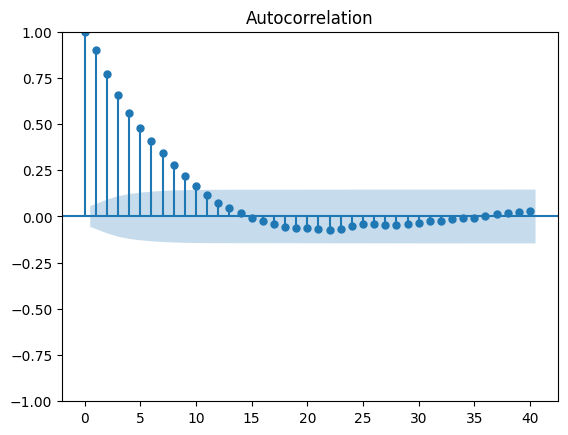

In [ ]:
plot_acf(base_A['CCI'], lags=40)
plt.show()

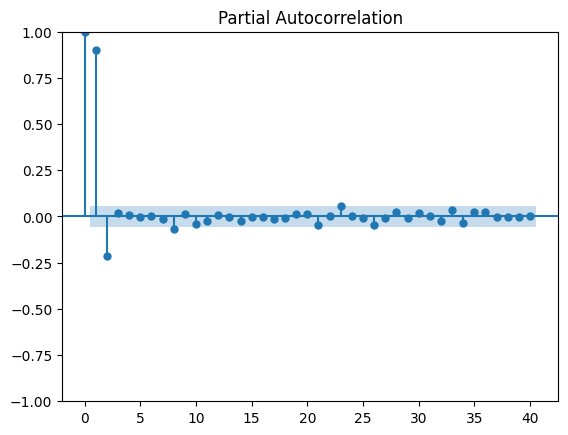

In [ ]:
plot_pacf(base_A['CCI'], lags=40)
plt.show()

In [ ]:
X = base_A['CCI'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

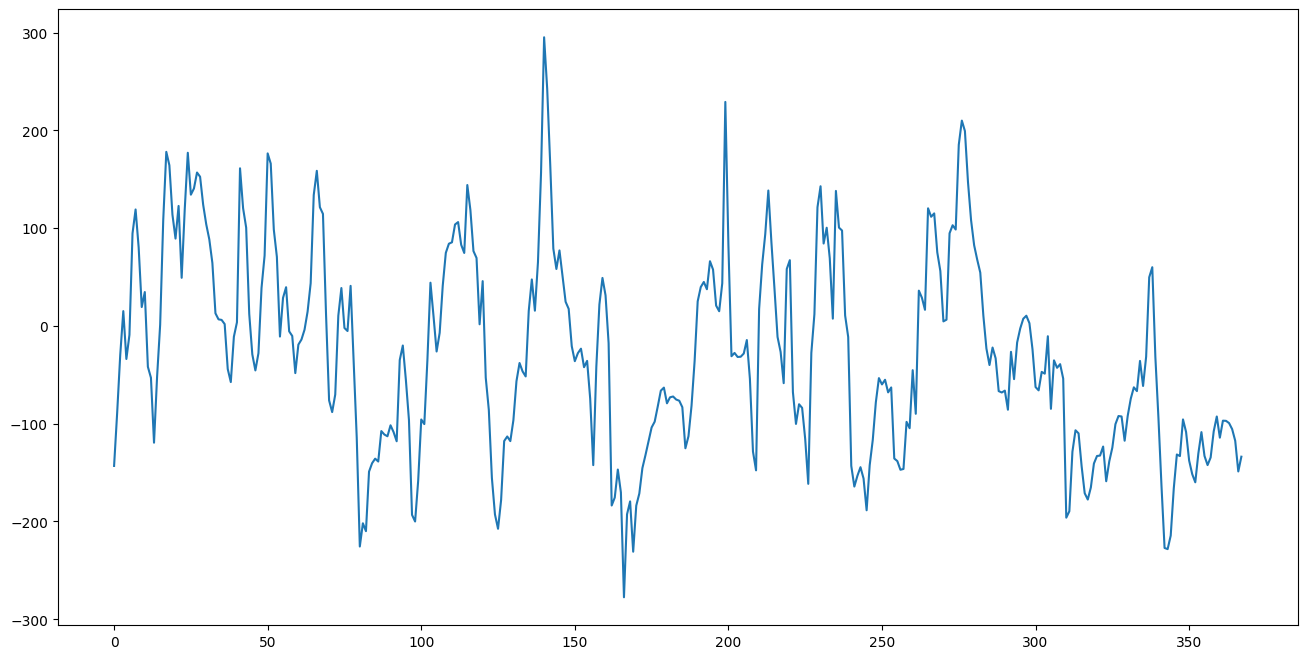

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.show()

In [ ]:
# ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

Expected=-126.99554343491319, Observed=-143.1743861602928
Expected=-128.31734784471104, Observed=-88.92168471583038
Expected=-67.74729154243775, Observed=-29.743271343130274
Expected=-13.884474130688268, Observed=15.126347538812484
Expected=22.931571873487215, Observed=-33.832104385152086
Expected=-41.40518195847171, Observed=-9.18551157782614
Expected=-3.2491073265358885, Observed=94.57050353505304
Expected=106.60917027050829, Observed=119.05624964080947
Expected=110.90382534602067, Observed=80.27369486749394
Expected=62.35029962898163, Observed=19.28153030083113
Expected=3.1047468132780622, Observed=34.61526713563121
Expected=33.720784083430615, Observed=-41.80638735482825
Expected=-54.51801541341699, Observed=-53.0283892391089
Expected=-50.08702369591546, Observed=-119.42659683837715
Expected=-121.37235036011964, Observed=-51.89657442847981
Expected=-31.799818934543744, Observed=1.1895839525775607
Expected=12.279204695873908, Observed=108.18562019401611
Expected=119.49799744831124, 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=-54.215113923513805, Observed=-11.088114140207573
Expected=0.18559160058310198, Observed=3.677185289563009
Expected=6.319982215572347, Observed=161.1530445736133
Expected=178.11488971915574, Observed=120.36443550066957
Expected=97.81683667639885, Observed=100.53037299751405
Expected=84.79558219611964, Observed=12.27972755381554
Expected=-8.662044561760709, Observed=-29.098233741587013
Expected=-35.131937586059074, Observed=-45.531848401909315
Expected=-44.22420074560922, Observed=-27.873890680509486
Expected=-21.028356609183376, Observed=38.795939471200136
Expected=48.98910136933405, Observed=71.89732539462547
Expected=70.96260412030043, Observed=176.3750338519875
Expected=179.7767542292638, Observed=165.97848645142403
Expected=144.88854398609172, Observed=98.47524188954998
Expected=72.1339191555395, Observed=70.57153503782419
Expected=56.23884279662583, Observed=-10.89771560948939
Expected=-28.073517679046105, Observed=28.64276147968791
Expected=34.06737169916312, Observed=39

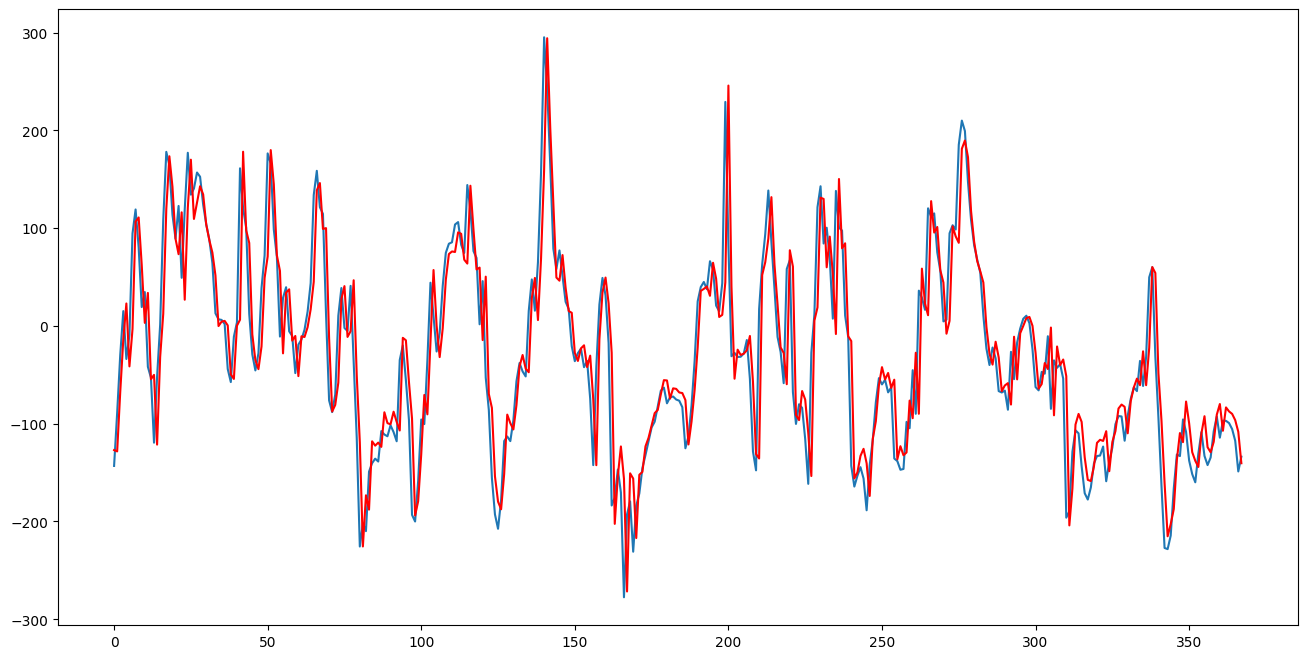

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.plot(forecasts, color='red')
plt.show()

In [ ]:
# Ensuring that data is one-dimensional
test = test.ravel()
forecasts = np.array(forecasts).ravel()

In [ ]:
# Getting the high, low, and close values ​​from the test set for the CCI
test_size_A = len(test)

high_test_A = base_A['High'].tail(test_size_A)
low_test_A = base_A['Low'].tail(test_size_A)
close_test_A = base_A['Close/Last'].tail(test_size_A)

In [ ]:
print(test.shape)
print(forecasts.shape)

(368,)
(368,)


In [ ]:
# Inverse CCI formula
def cci_inverse_A(cci_values_A, high_test_A, low_test_A, close_test_A):
    tp = (high_test_A + low_test_A + close_test_A) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_deviation = (tp - sma_tp).abs().rolling(window=20).mean()
    tp_inverted = cci_values_A * 0.015 * mean_deviation + sma_tp
    return tp_inverted

In [ ]:
test_inverted = cci_inverse_A(test, high_test_A, low_test_A, close_test_A)
forecasts_inverted = cci_inverse_A(forecasts, high_test_A, low_test_A, close_test_A)

In [ ]:
test_inverted = test_inverted.dropna()
forecasts_inverted = pd.Series(forecasts_inverted).dropna()

In [ ]:
min_length_R = min(len(test_R), len(forecasts_inverted))
test_R = test_R[:min_length_R]
forecasts_inverted = forecasts_inverted[:min_length_R]

In [ ]:
# RMSE
rmse = sqrt(mean_squared_error(test_R, forecasts_inverted))
print(f'RMSE: {rmse}')

# R2 Score
r2 = r2_score(test_R, forecasts_inverted)
print(f'R2 Score: {r2}')

RMSE: 13.158334038432244
R2 Score: 0.48213326179691185


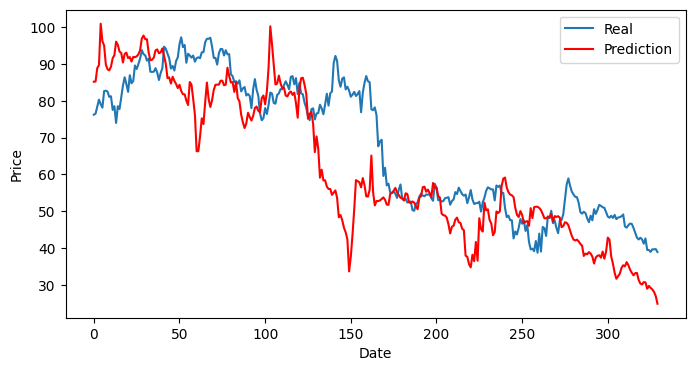

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test_R)), test_R, label='Real')
plt.plot(range(len(forecasts_inverted)), forecasts_inverted, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()